# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Lets start with grayscale

### Imshow basics

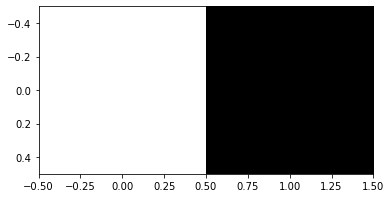

In [3]:
# plt image show is a method that plots an image by looking at a 2-D matrix
# lowest value in list is white, highest being black
plt.imshow([[0,1]], cmap='Greys')

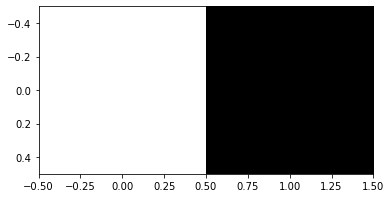

In [4]:
# Note 0 does not mean white. it was just the lowest value. So for example
plt.imshow([[-1,0]], cmap='Greys')

So what about 3 values?

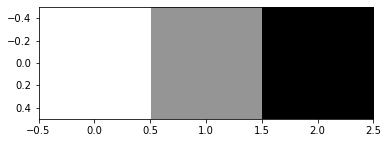

In [5]:
plt.imshow([[-1,0,1]], cmap='Greys')

Do you have to use greys?

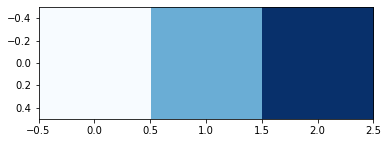

In [6]:
plt.imshow([[-1,0,1]], cmap='Blues')

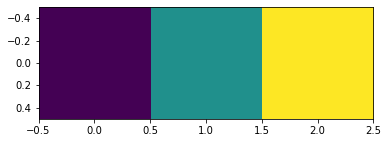

In [7]:
#Default color pallete. Python uses as distinct a color pallette
plt.imshow([[-1,0,1]])

As day to day images are concerned though, if we were to break images down on color spectrum we think of color/b&w pictures as a basic grouping. Its standard convention for single channel images to be displayed in grey, but any color map can be used. 

Depending upon the 'bitdepth', the more range of values in the data, and as you can imagine, more shades appear.

### bit-depth

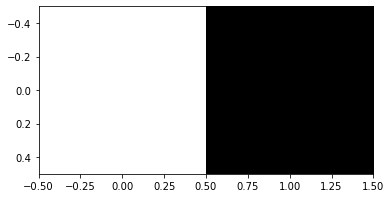

In [8]:
#1-bit
plt.imshow([[0,1]], cmap='Greys')

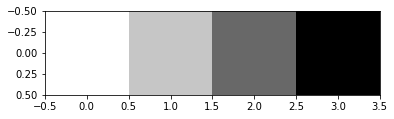

In [9]:
#2-bit
plt.imshow([[0,1,2,3]], cmap='Greys')

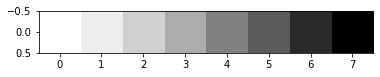

In [10]:
#3-bit
plt.imshow([[0,1,2,3,4,5,6,7]], cmap='Greys')

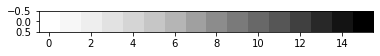

In [11]:
#4-bit (1byte)
plt.imshow([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], cmap='Greys')

Everyday images are in general 8-bit, which is why you'll see values ranging from 0-255

In [12]:
bit8_array = np.arange(0,256)
bit8_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

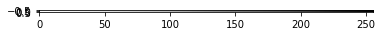

In [13]:
#4-bit (1byte)
plt.imshow([bit8_array], cmap='Greys')

Imshow has a hard time displaying all of it on 1-D

We can change the aspect ratio so we can better see the gradient. This does reshape the array, just stretches out the axis.

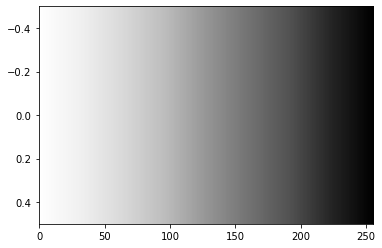

In [14]:
#4-bit (1byte)
plt.imshow([bit8_array], cmap='Greys', aspect='auto')

Having just 1 'channel' of image information is like having just 2-D data information, like in the examples above


However, in RGB, you have 3 channels of information. So imagine a 3-D tensor. Yeah, 3-D information for a 2-D image.
Each channel will contain information for each color, pixel by pixel. When combined give us the full color spectrum.



So for a _8-bit_ RGB image

__R channel__: an array of values 0-255 just showing red values

__G channel__: an array of values 0-255 just showing green values

__B channel__: an array of values 0-255 just showing blue values

### NOTE on color convention
Even though imshow has so far been using the convention

lowest_value:white

highest_value:black

When imshow is fed 3-D tensor it follows the standard RGB convention.


__Standard convention for RGB images__

0: minimum color

255: maximum color (channel respective. eg: R channel, 255 max red)



__Therefore, for RGB images__ 

black pixel is [0,0,0]

white pixel is [255,255,255]

red pixel is [255,0,0]

green pixel is [0,255,0]

blue pixel is [0,0,255]

mid gray is [125,125,125]


Every color in between is a combination of these primary colors (who wants to go back to middle school?)




General convention of image dimensions when being used in imshow (and just about anywhere else), the first 2 are height x weight. An additional dimension is be used to show channels. Its confusing because in standard image dimension we talk width first (think 1920x1080)

RGB has 3 channels, so an image would be height x width x 3
Other conventions might have other dimensions.

Lets startsimple.\
Lets create a 4bit RGB image

In [15]:
bit4_channel = np.arange(0,256)
bit4_channel.shape

(256,)

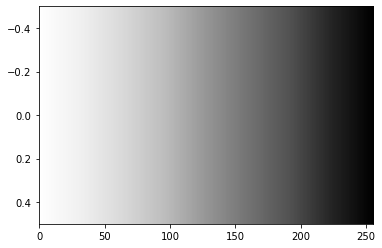

In [16]:
#This is the same as before. This is a single channel of data
plt.imshow([bit4_channel],cmap = 'Greys',aspect = 'auto')

In [17]:
#Now lets stack 3 of the same  channels together. 
#dstack is depth wise stacking. try vstack, hstack, and dstack and look at the resulting matrix and shape
RGB = np.dstack([bit4_channel,bit4_channel,bit4_channel])
RGB.shape

(1, 256, 3)

So, RGB here is "3-D", height: 1, width: 256, channels:3

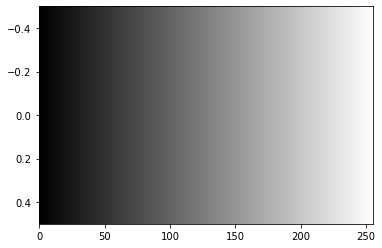

In [18]:
plt.imshow(RGB,aspect = 'auto')

Ok... whats going on? Looks exactly the same, just flipped. Lets look at the left most point

In [19]:
RGB[:,0]

array([[0, 0, 0]])

R value: 0 (pure black)\
G value: 0 (pure black)\
B value: 0 (pure black)\

Result: pure black

Lets look at the midpoint.

In [20]:
RGB[:,125]

array([[125, 125, 125]])

Ok. 125 on all channels

Perfectly Gray

Ok. So that means, perfectly white, which is the right most edge will be...

In [21]:
RGB[0,255]

array([255, 255, 255])

Also, note, no color map was passed but even if you did, it would make no difference

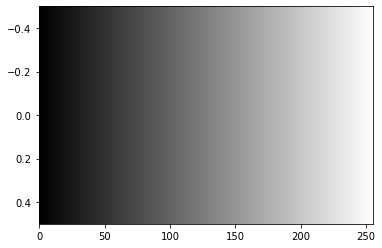

In [22]:
plt.imshow(RGB,cmap='Reds',aspect = 'auto')

Essentially, if the 3 channel values for R,G,B are the same, the resulting pixel is on the gray scale.

## Total random channels

Lets randomize each channel

We'll just create 1 x 256 x 3 array with random values from 0 to 255

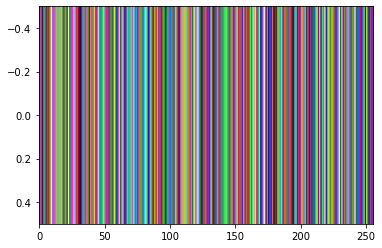

In [23]:
random_RGB = np.random.randint(low=0,high=255,size=(1,256,3))
plt.imshow(random_RGB,aspect='auto')

Ok... not as pretty as I was hoping. But hopefully kind of gives an idea of how color is working in the background.

Lets  delve  into it some more.

## Primary Color Gradients

### Red Gradient

Lets create a red gradient followed by a green and a blue

Since a perfectly black pixel is [0,0,0] and a perfect red pixel is [255,0,0]. Then to get the red gradient you want the red channel to range from 0 to 255, while the remaining 2 channels remain at zeroes. in other words they don't add any of their respective color.

In [24]:
zeros_channel = np.zeros((1,256,1),dtype=int)

In [25]:
r_channel = np.arange(0,256)
g_channel = zeros_channel
b_channel = zeros_channel

In [26]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

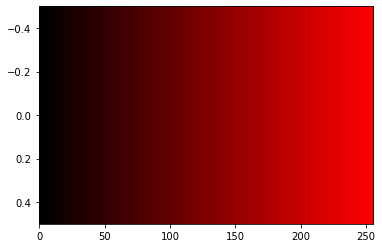

In [27]:
 plt.imshow(RGB,aspect='auto');

### Green Gradient

In [28]:
r_channel = np.zeros((1,256,1),dtype=int)
g_channel = np.arange(0,256).reshape(1,256,1)
b_channel = np.zeros((1,256,1),dtype=int)

In [29]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

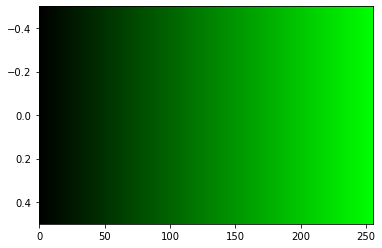

In [30]:
 plt.imshow(RGB,aspect='auto');

### Blue Gradient

In [31]:
r_channel = zeros_channel
g_channel = zeros_channel
b_channel = np.arange(0,256)

In [32]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

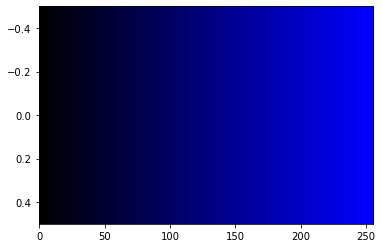

In [33]:
 plt.imshow(RGB,aspect='auto');

Easy enough. How about Yellow?

## Secondary color gradient

### Yellow Gradient

In [34]:
r_channel = np.arange(0,256)
g_channel = np.arange(0,256)
b_channel = zeros_channel

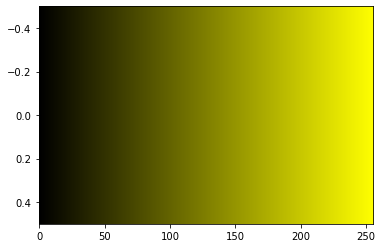

In [35]:
 plt.imshow(np.dstack([r_channel,g_channel,b_channel])
            ,aspect='auto');

### Cyan Gradient

In [36]:
r_channel = zeros_channel
g_channel = np.arange(0,256)
b_channel = np.arange(0,256)

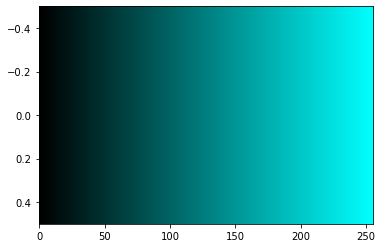

In [37]:
 plt.imshow(np.dstack([r_channel,g_channel,b_channel])
            ,aspect='auto');

### Magenta Gradient

In [38]:
r_channel = np.arange(0,256)
g_channel = zeros_channel
b_channel = np.arange(0,256)

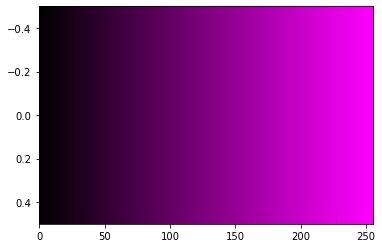

In [39]:
 plt.imshow(np.dstack([r_channel,g_channel,b_channel])
            ,aspect='auto');

## Complex color gradients

### Faux full color spectrum

In [40]:
bit4_channel_R = np.arange(0, 256)
bit4_channel_G = np.hstack([np.arange(0, 256), np.arange(255, -1, -1)])[::2]
bit4_channel_B = np.hstack([
    np.arange(0, 256, 1),
    np.arange(255, -1, -1),
    np.arange(0, 256, 1),
    np.arange(255, -1, -1),
]
)[::4]

Lets have a quick look as to what each one of these channels are doing

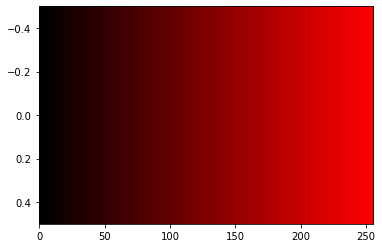

In [41]:
plt.imshow(np.dstack([bit4_channel_R,zeros_channel,zeros_channel])
           ,aspect='auto');

Ok. The red channel holds a standard red gradient

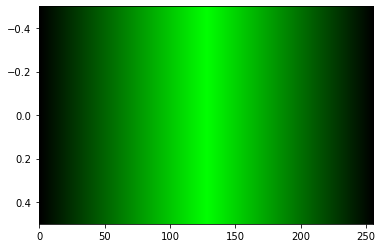

In [42]:
plt.imshow(np.dstack([zeros_channel,bit4_channel_G,zeros_channel])
           ,aspect='auto');

The green channel a 'folded'(?) green gradient

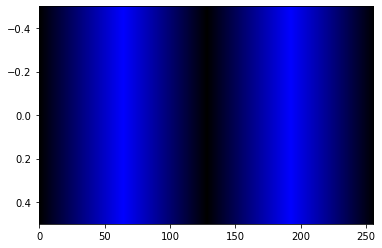

In [43]:
plt.imshow(np.dstack([zeros_channel,zeros_channel,bit4_channel_B])
           ,aspect='auto');

The blue channel a 'bi-folded'(?) green gradient

When plotted together, they give us

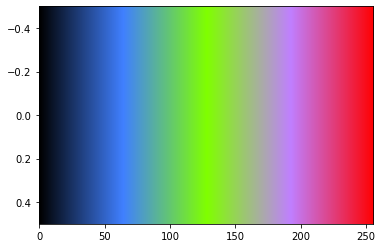

In [44]:
plt.imshow(np.dstack([bit4_channel_R,bit4_channel_G,bit4_channel_B])
           ,aspect='auto');

### Full 4bit color spectrum

In [45]:
# bit4_channel_R = np.hstack([np.arange(0, 256), np.arange(255, -1, -1)])[::2].reshape(1,256)
bit4_channel_R = np.arange(0, 256).reshape(1,256)
# bit4_channel_G = np.hstack([np.arange(0, 256), np.arange(255, -1, -1)])[::2].reshape(256,1)
bit4_channel_G = np.arange(0, 256).reshape(256,1)
# bit4_channel_B = np.arange(0, 256).reshape(1,256)

bit4_channel_R.shape, bit4_channel_G.shape, bit4_channel_B.shape

((1, 256), (256, 1), (256,))

In [46]:
bit4_channel_R_tiled = np.tile(bit4_channel_R,(256,1))
bit4_channel_G_tiled = np.tile(bit4_channel_G,(1,256))
bit4_channel_R_tiled.shape, bit4_channel_G_tiled.shape, 

((256, 256), (256, 256))

In [47]:
bit4_channel_B_tiled = np.zeros((256,256),dtype=int)
center = np.array((127,127))
side = bit4_channel_B_tiled.shape[0]
for i in range(0,256):
    for j in range(0,256):
        if i+j> 255:
            bit4_channel_B_tiled[i,j] =  255  - (i+j)%255
        else:
            bit4_channel_B_tiled[i,j] = i+j

#         d = np.linalg.norm(np.array((i,j)) - center)    
#         val = 255 - int((d / (256/2) *255))

#         if val>0:
#             bit4_channel_B_tiled[i,j] = val

        


In [48]:
255 - int((128 / (256/2) *255))

0

In [49]:
zero_tiled_channel = np.zeros((256,256),dtype=int)

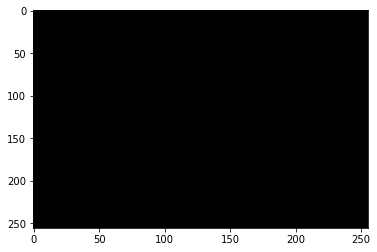

In [50]:
plt.imshow(np.dstack([zero_tiled_channel,
                      zero_tiled_channel,
                      zero_tiled_channel])
           ,aspect='auto');

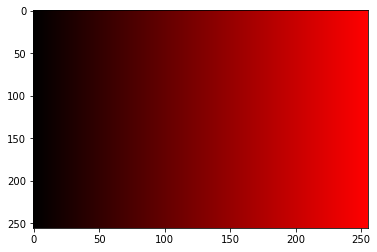

In [87]:
plt.imshow(np.dstack([bit4_channel_R_tiled,
                      zero_tiled_channel,
                      zero_tiled_channel])
           ,aspect='auto');

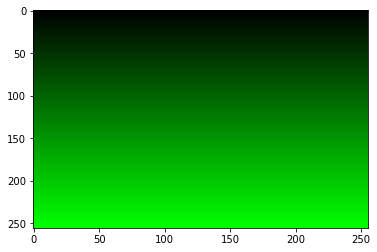

In [52]:
plt.imshow(np.dstack([zero_tiled_channel,
                      bit4_channel_G_tiled,
                      zero_tiled_channel])
           ,aspect='auto');

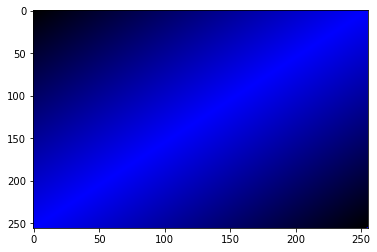

In [53]:
plt.imshow(np.dstack([zero_tiled_channel,
                      zero_tiled_channel,
                      bit4_channel_B_tiled])
           ,aspect='auto');

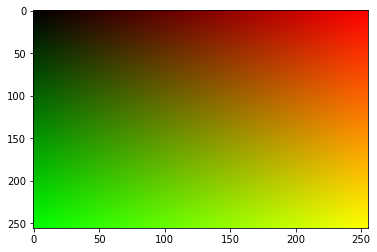

In [54]:
plt.imshow(np.dstack([bit4_channel_R_tiled,
                      bit4_channel_G_tiled,
                      zero_tiled_channel])
           ,aspect='auto');

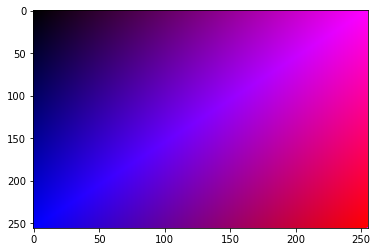

In [55]:
plt.imshow(np.dstack([bit4_channel_R_tiled,
                      zero_tiled_channel,
                      bit4_channel_B_tiled])
           ,aspect='auto');

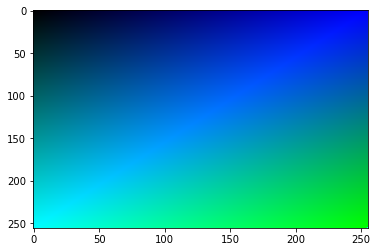

In [56]:
plt.imshow(np.dstack([zero_tiled_channel,
                      bit4_channel_G_tiled,
                      bit4_channel_B_tiled])
           ,aspect='auto');

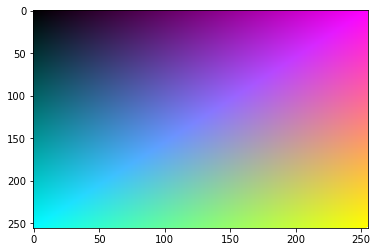

In [57]:
plt.imshow(np.dstack([bit4_channel_R_tiled,
                      bit4_channel_G_tiled,
                      bit4_channel_B_tiled])
           ,aspect='auto');

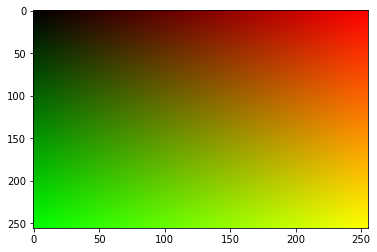

In [58]:
RG_tile = np.dstack([bit4_channel_R_tiled,
                      bit4_channel_G_tiled,
                      zero_tiled_channel])
plt.imshow(RG_tile,aspect='auto')

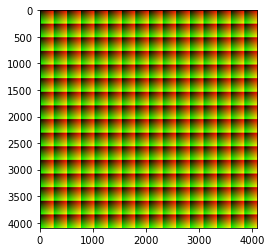

In [64]:
RG_super_tile = RG_tile
for i in range(0,4):
    RG_super_tile = np.hstack([RG_super_tile,RG_super_tile])
for i in range(0,4):
    RG_super_tile = np.vstack([RG_super_tile,RG_super_tile])

plt.imshow(RG_super_tile)

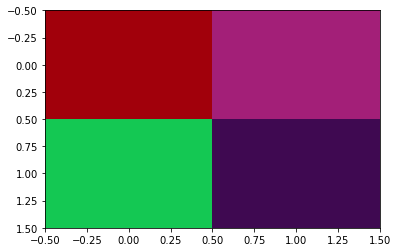

In [65]:
random_RGB = np.random.randint(low=0,high=255,size=(2,2,3))
plt.imshow(random_RGB,aspect='auto')

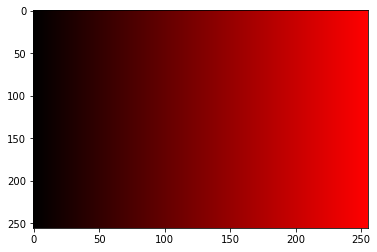

In [91]:
#4-bit (1byte)
t = np.dstack([bit4_channel_R_tiled,
                      zero_tiled_channel,
                      zero_tiled_channel])
plt.imshow(t,aspect='auto')

In [92]:
t.shape

(256, 256, 3)

In [90]:
plt.imshow(t.reshape(16,16,3))

ValueError: cannot reshape array of size 196608 into shape (16,16,3)

In [107]:
RGB_blue_supertile = np.zeros((2, 2, 1))
for i in range(1,256):
    RGB_blue_supertile = np.hstack([RGB_blue_supertile,i*np.ones((2, 2, 1))])

In [108]:
RGB_blue_supertile.shape

(2, 512, 1)

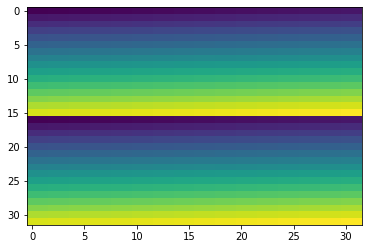

In [114]:
plt.imshow(RGB_blue_supertile.reshape(32,32,1), aspect='auto')